In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv(r"CHURN\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\yusuf\AppData\Local\Temp\ipykernel_15420\1363979490.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), center=0)


<AxesSubplot: >

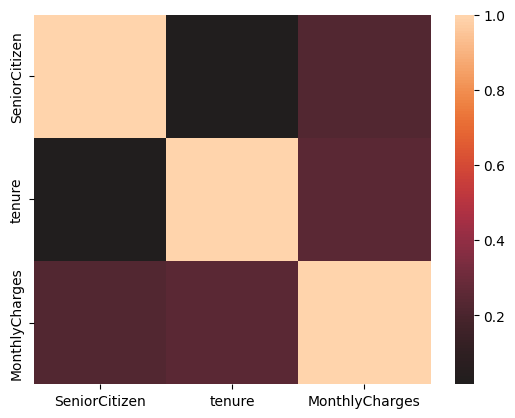

In [83]:
sns.heatmap(df.corr(), center=0)

In [84]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


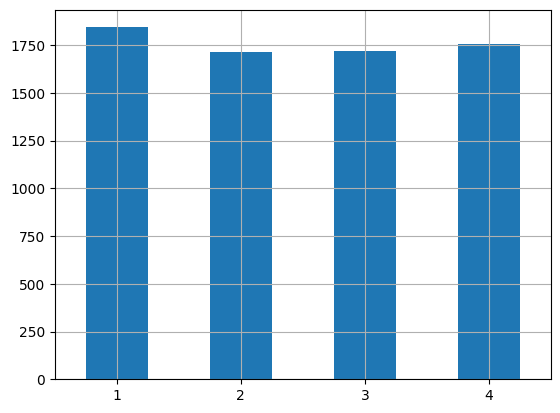

In [85]:
df["tenure_Cat"] = pd.cut(df["tenure"],bins=[0., 9., 29.0, 55., np.inf],labels=[1, 2, 3, 4])
df["tenure_Cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
df = df.drop(["tenure"],axis=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   PhoneService      7043 non-null   object  
 6   MultipleLines     7043 non-null   object  
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   object  
 9   OnlineBackup      7043 non-null   object  
 10  DeviceProtection  7043 non-null   object  
 11  TechSupport       7043 non-null   object  
 12  StreamingTV       7043 non-null   object  
 13  StreamingMovies   7043 non-null   object  
 14  Contract          7043 non-null   object  
 15  PaperlessBilling  7043 non-null   object  
 16  PaymentMethod     7043 n

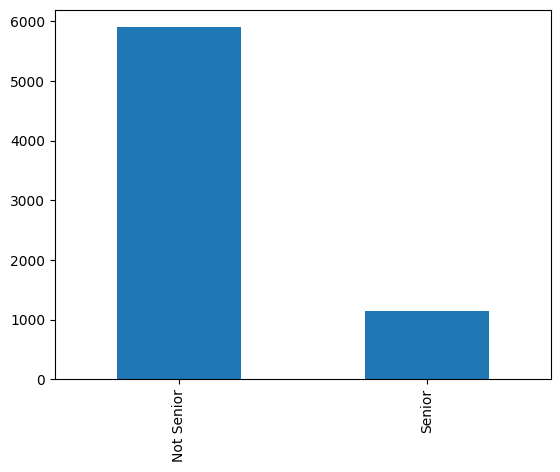

In [87]:
df["Senior"] = pd.cut(df["SeniorCitizen"],bins=[-1., .9, np.inf],labels=["Not Senior","Senior"])
df["Senior"].value_counts().plot(kind="bar")
df = df.drop(["SeniorCitizen"], axis=1)

In [88]:
df.info()
df = df.replace('^\s*$',np.nan, regex = True)
df.dropna(axis = 0 ,inplace = True)
df.shape #11 missing observations are removed
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   PhoneService      7043 non-null   object  
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  Contract          7043 non-null   object  
 14  PaperlessBilling  7043 non-null   object  
 15  PaymentMethod     7043 non-null   object  
 16  MonthlyCharges    7043 n

customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_Cat          0
Senior              0
dtype: int64

In [89]:
df['TotalCharges'] = pd. to_numeric(df['TotalCharges'])
df_2 = pd.get_dummies(df.drop(["customerID","Churn"], axis=1))
df_2.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_Cat_1,tenure_Cat_2,tenure_Cat_3,tenure_Cat_4,Senior_Not Senior,Senior_Senior
0,29.85,29.85,1,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,56.95,1889.50,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
2,53.85,108.15,0,1,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
3,42.30,1840.75,0,1,1,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
4,70.70,151.65,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [90]:
df_2["customerID"] = df["customerID"]
df_2.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_Cat_1,tenure_Cat_2,tenure_Cat_3,tenure_Cat_4,Senior_Not Senior,Senior_Senior,customerID
0,29.85,29.85,1,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,7590-VHVEG
1,56.95,1889.50,0,1,1,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,5575-GNVDE
2,53.85,108.15,0,1,1,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,3668-QPYBK
3,42.30,1840.75,0,1,1,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,7795-CFOCW
4,70.70,151.65,1,0,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,9237-HQITU


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 n

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
y = df["Churn"]
X = df_2.drop(["customerID"], axis=1)
y.head()


0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)
from sklearn import metrics

Will work on the pipeline for different alghorithms and a grid search for parameters

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
clf = make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=42))
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)


0.7164179104477612

In [95]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
gnb = make_pipeline(StandardScaler(),GaussianNB())
model = gnb.fit(X_train, y_train)
y_pred = model.predict(X_test)
cfm = confusion_matrix(y_pred, y_test)
cfm
metrics.accuracy_score(y_pred,y_test)

0.6865671641791045

In [117]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(C=10,gamma='auto', kernel="linear"))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cfm = confusion_matrix(y_pred,y_test)
cfm
metrics.accuracy_score(y_pred,y_test)

0.7945984363894811

In [108]:
from sklearn.ensemble import RandomForestClassifier
clf = make_pipeline(StandardScaler(),RandomForestClassifier(min_samples_leaf=5,min_samples_split=5,max_depth=5, random_state=0, n_estimators=150))
model = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cfm = confusion_matrix(y_pred, y_test)
cfm
metrics.accuracy_score(y_pred,y_test)

0.7917555081734187

In [116]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7910447761194029